In [3]:
import cvxpy as cp
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from Data.Dataset import LatentFMRIDataset
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Data

In [4]:
nyu_dataset_directory = '/Users/balazsmorvay/PycharmProjects/VAE/Assets/NYU_all'
um1_dataset_directory = '/Users/balazsmorvay/PycharmProjects/VAE/Assets/UM_1_all'

In [5]:
nyu_data = LatentFMRIDataset(data_dir=nyu_dataset_directory).get_all_items()
um1_data = LatentFMRIDataset(data_dir=um1_dataset_directory).get_all_items()

In [6]:
train_test_split = 0.8

In [7]:
X_nyu = nyu_data['X']
y_nyu = nyu_data['y']
X_um1 = um1_data['X']
y_um1 = um1_data['y']

X_um1, y_um1 = shuffle(X_um1, y_um1, random_state=41) # Shuffle to mix the labels

X_nyu = X_nyu.reshape((X_nyu.shape[0], -1))
X_um1 = X_um1.reshape((X_um1.shape[0], -1))
y_nyu = y_nyu
y_um1 = y_um1

# Train test split of UM1
X_um1_train = X_um1[:int(train_test_split*X_um1.shape[0])]
X_um1_test = X_um1[int(train_test_split*X_um1.shape[0]):]
y_um1_train = y_um1[:int(train_test_split*y_um1.shape[0])]
y_um1_test = y_um1[int(train_test_split*y_um1.shape[0]):]

X_nyu_train = X_nyu[:int(train_test_split*X_nyu.shape[0])]
X_nyu_test = X_nyu[int(train_test_split*X_nyu.shape[0]):]
y_nyu_train = y_nyu[:int(train_test_split*y_nyu.shape[0])]
y_nyu_test = y_nyu[int(train_test_split*y_nyu.shape[0]):]

In [8]:
X_nyu.shape, y_nyu.shape, X_um1_train.shape, y_um1_train.shape, X_um1_test.shape, y_um1_test.shape

((29575, 1152), (29575,), (18880, 1152), (18880,), (4720, 1152), (4720,))

# SVM

In [9]:
model = LinearSVC(C=1.0, loss='hinge', class_weight=None, fit_intercept=False, random_state=42, verbose=True, max_iter=1000)
model.fit(X=X_nyu_train, y=y_nyu_train)

/Users/balazsmorvay/anaconda3/envs/fmri_classifier/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -556.012981
nSV = 8652


/Users/balazsmorvay/anaconda3/envs/fmri_classifier/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(fit_intercept=False, loss='hinge', random_state=42, verbose=True)

{'accuracy': 0.9999999998309382,
 'recall': 0.9999999997100609,
 'precision': 0.9999999997100609}

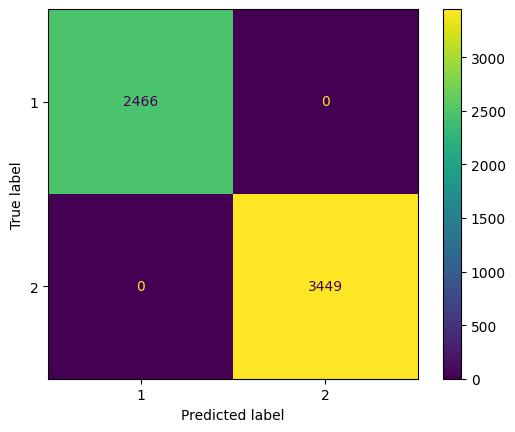

In [10]:
test_predictions = model.predict(X_nyu_test)
cm = confusion_matrix(y_nyu_test, test_predictions, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()
tn, fp, fn, tp = cm.ravel()
metrics = {
    'accuracy': ((tp + tn) / (tp + tn + fp + fn + 1e-6)),
    'recall': (tp / (tp + fn + 1e-6)),
    'precision': (tp / (tp + fp + 1e-6))
}
metrics

# LP

In [11]:
X_um1_train = X_um1_train[:100]
y_um1_train = y_um1_train[:100]
X_um1_train.shape

(100, 1152)

In [12]:
num_train_data = X_um1_train.shape[0]

In [13]:
w = np.array(model.coef_).reshape(1152) # weights of the svm
y = list(map(lambda x: -1 if x == 1 else 1, y_um1_train)) # class labels in {-1;1}
y = np.array(y)

In [14]:
Pi = cp.Variable(shape=(1152, 1152), name='Pi')
#b = cp.Variable(shape=(1152, num_train_data), name='b')

objective = cp.Minimize(cp.trace(cp.maximum(0, np.eye(num_train_data) - (cp.outer(y, w)) @ Pi @ X_um1_train.T)))

prob = cp.Problem(objective, constraints=[])

In [ ]:
result = prob.solve()

In [1]:
print(Pi.value)

NameError: name 'Pi' is not defined